# Modules & Packages & Environments

## Modules

 * A module is the way of organizing your code when it grows
 * In Python modules are just .py-files or directories with .py-files
 * Some modules are shipped with Python
 * In order to use code located in modules you have to import it first

Layout:

```
├── mymodule
|   ├── mysubmodule
│   │   ├── __init__.py
|   ├── my.py
|   ├── __init__.py
```

Example:

```
from mymodule.my import myfun
from mymodule import mysubmodule

myfun()
mysubmodule.otherfun()
```

* ```__init__.py``` files are required to make Python treat a directory as a module
* ```__init__.py``` can just be an empty file, but it can also execute initialization code for the module or specify what can be imported using special dunder variables, like ```__all__```, for example

Module aliasing:
    
```
import numpy as np

np.zeros((3, 2))
```

Import several packages:
```
import os, sys
```

Import statement uses the following convention: if package’s ```__init__.py``` code defines a list named ```__all__```, it is taken to be the list of module names that should be imported when from package import * is encountered.

If ```mymodule/mysubmodule/__init__.py``` contains
```
__all__ = ["myfun", "otherfun"]
```

This line:
```
from mymodule.mysubmodule import *
```

will import ```myfun``` and ```otherfun``` only. Using wildcard imports **is a bad practice**.

## Packages and environments

Terminology first:

* **PyPI** is the default Package Index (a repository) for the Python community: [pypi.org](https://pypi.org/)
* **Egg**: A Built Distribution format introduced by **setuptools**, which is being replaced by **Wheel**
* **Wheel**: A Built Distribution format introduced by PEP 427, which is intended to replace the **Egg** format. Wheel is currently supported by **pip**
* **sdist**: A distribution format that provides metadata and the essential source files needed for installing by a tool like pip
* **setup.py**: The project specification file for **distutils** and **setuptools**
* **requirements.txt**: A file containing a list of requirements (dependencies) that can be installed using pip.


### Packaging tools

* **Distutils** is still the standard tool for packaging in Python. It is included in the standard library (Python 2 and Python 3.0 to 3.6). It is useful for simple Python distributions, but lacks features.
* **Setuptools** was developed to overcome Distutils' limitations, and is not included in the standard library. It introduced a command-line utility called ```easy_install```.
* **Abandoned**: Distribute, Distutils2
* **Alpha**: Distlib
* **Alternatives**: Bento, Enscons

[Stackoverflow](https://stackoverflow.com/questions/6344076/differences-between-distribute-distutils-setuptools-and-distutils2)

### Package managers

* **PyPi/setuptools**:
    - ```easy_install```: 2004, install from Eggs, no uninstall packages, no Wheel support
    - ```pip```: 2008, no install from Eggs, install from sdist or from Wheel recently, requirement files. Pip uses stanard PyPI repository.
* **Anaconda**: ```conda```. Uses it's own Anaconda Cloud repository.
* **Spack**: ```spack```

### Virtual environments

* **Virtualenv**
* **Pyenv**: forked from rbenv and ruby-build, and modified for Python.
* **Anaconda**: package index + package manager + environment manager

[Stackoverflow](https://stackoverflow.com/questions/38217545/the-different-between-pyenv-virtualenv-anaconda-in-python)

### Anatomy of a package

```
├── foo
│   ├── a_module.py
│   ├── __init__.py
├── README
└── setup.py
```

**setup.py:**

```
from setuptools import setup

setup(
   name='foo',
   version='1.0',
   description='A useful module',
   author='Man Foo',
   author_email='foomail@foo.com',
   packages=['foo'],
   install_requires=['bar>=1', 'greek>=1,<2']
)
```

To build & install package:

```python setup.py build && python setup.py install```

### Typical application

```
├── project
│   ├── submodule
│   │   ├── __init__.py
│   │   ├── my.py
│   ├── app.py
│   ├── __init__.py
└── requirements.txt
```

**requirements.txt:**

```
bar==0.12.2
greek>=1
-e git+git://github.com/path/to/repo@releases/3.7.1#egg=charlie
```

To install application dependencies:

```pip install -r requirements.txt```

### PIP in a nutshell

[PIP docs](https://pip.pypa.io/en/stable/)

* ```pip search <pattern>```
* ```pip install <package>```
* ```pip uninstall <package>```
* Save from env: ```pip freeze > requirements.txt```
* List outdated: ```pip list --outdated --format=freeze```
* Upgrade all: ```pip freeze --local | grep -v '^\-e' | cut -d = -f 1  | xargs -n1 pip install -U```

Please run a terminal under an environment (most likely `root`):

 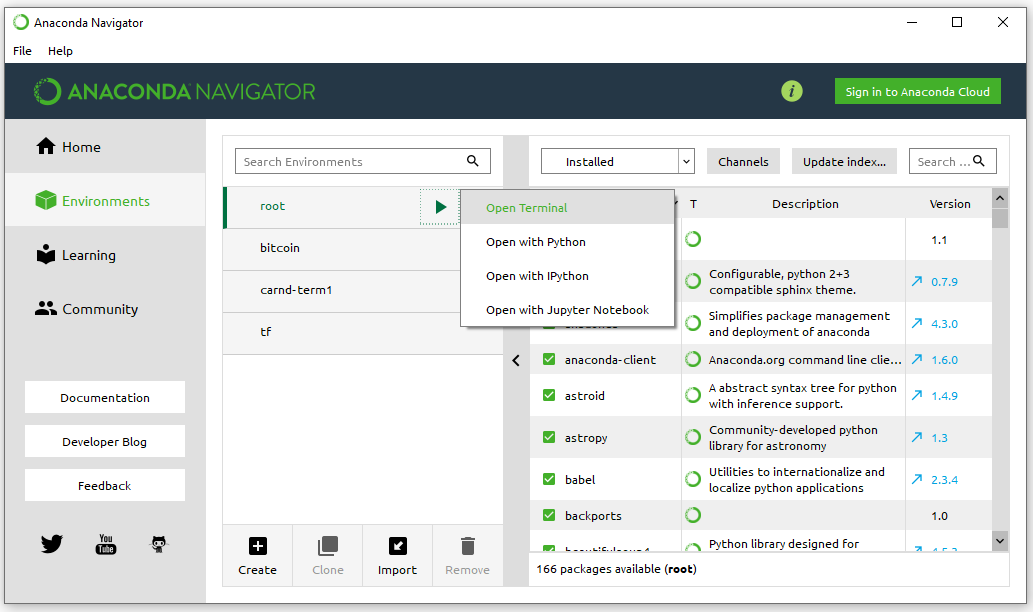

In the opened terminal try to run these commands:

 * `pip search requests`
 * `pip install requests`
 
 It should install module `requests` under your environment.

## Overview of built-in modules

[The Python Standard Library¶](https://docs.python.org/2/library/)

### time and datetime

 * The `time` module provides various time-related functions.
 * The `datetime` module supplies classes for manipulating dates and times.
 
Several formats and containers to represent date and time:
 * Unix timestamp
 * time.struct_time
 * datetime.datetime
 * datetime.date
 * datetime.time

In [34]:
import time
import datetime

`time.time()` returns the time in seconds since *the epoch* as a floating point number.

> Unix time (also known as POSIX time or UNIX Epoch time) is a system for describing a point in time. It is the **number of seconds** that have elapsed **since 00:00:00 Thursday, 1 January 1970**, Coordinated Universal Time (UTC), minus leap seconds.

In [38]:
now = time.time()
now

1566427803.744475

`time.gmtime([secs])` returns time as a structure. If parameter is ommited returns current time (in UTC).

In [39]:
time.gmtime(now)

time.struct_time(tm_year=2019, tm_mon=8, tm_mday=21, tm_hour=22, tm_min=50, tm_sec=3, tm_wday=2, tm_yday=233, tm_isdst=0)

`time.localtime()` is like `time.gmtime()` but returned time is adjusted to local timezone:

In [40]:
time.localtime(now)

time.struct_time(tm_year=2019, tm_mon=8, tm_mday=22, tm_hour=1, tm_min=50, tm_sec=3, tm_wday=3, tm_yday=234, tm_isdst=1)

Use `time.mktime()` to convert to Unix time:

In [41]:
time.mktime(time.localtime())

1566427837.0

In [42]:
timezone_secs = time.mktime(time.localtime()) - time.mktime(time.gmtime())
timezone_secs

7200.0

`datetime.datetime` is an OOP wrapper for date & time:

In [46]:
# in UTC
print datetime.datetime.utcnow()
# local time zone
print datetime.datetime.now()

2019-08-21 22:54:08.964950
2019-08-22 01:54:08.965604


Use `datetime.timedelta()` for date-time arithmetics:

In [66]:
now = datetime.datetime.now()
year = datetime.timedelta(days=365)

next_year = now + year
last_year = now - year

str(next_year), str(last_year)

('2020-08-21 02:17:05.660064', '2018-08-22 02:17:05.660064')

In [65]:
print next_year - last_year
print last_year - next_year

730 days, 0:00:00
-730 days, 0:00:00


`datetime.datetime` supports comparison:

In [62]:
print next_year > last_year
print next_year < last_year

True
False


Use `datetime.strftime()` to customize date formatting:


| Directive | Meaning |
|-----------|---------|
| %d        | Day of the month as a zero-padded decimal number  |
| %m        | Month as a zero-padded decimal number. |
| %y        | Year without century as a zero-padded decimal number.  |
| %Y        | Year with century as a decimal number. |
| %H        | Hour (24-hour clock) as a zero-padded decimal number. |
| %M        | Minute as a zero-padded decimal number. |
| ...       | ... |

[Full list](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior)

In [59]:
next_year.strftime("%Y/%m/%d %H~%M")

'2020/08/21 02~01'

In [67]:
# ISO 8601 format -> YYYY-MM-DDTHH:MM:SS.mmmmmm
next_year.isoformat()

'2020-08-21T02:17:05.660064'

### random

In [146]:
import random

Random generator in Python is intentionally **deterministic**. If you need true randomness, find a different source.

Initialize random generator:

In [147]:
random.seed(123)

`random.randrange(start, stop[, step])` returns random number from the `range()`

In [150]:
random.randrange(0, 9, 2)

4

In [151]:
random.randrange(0, 9, 2)

0

In [152]:
random.randrange(0, 9, 2)

8

`random.randint(a, b)`, returns random integer `a <= N <= b`

In [153]:
random.randint(100, 110)

100

In [154]:
random.randint(100, 110)

105

`random.choice()` takes a random element of a sequence.

In [155]:
random.choice('abcdef')

'b'

`random.shuffle()` randomly rearranges elements of the given list.

In [160]:
mylist = ['a', 'b', 'c', 'd']
random.shuffle(mylist)
mylist

['c', 'd', 'b', 'a']

`random.gauss(mu, sigma)` returns a random number given Gauss distribution D(my, sigma)

In [161]:
random.gauss(0, 1)

0.0017570501659745208

In [162]:
random.gauss(0, 1)

0.057799773307379655

In [163]:
random.gauss(0, 1)

-0.39436312062498746

### collections

[Docs](https://docs.python.org/2/library/collections.html)

In [71]:
import collections

`collections.deque` is LIFO (stack) and FIFO (queue) implementation

In [81]:
d = collections.deque('abc')
d

deque(['a', 'b', 'c'])

deque is very similar to list (and you can replace it with a list), but sometimes it's a very convenient structure because of these methods:
 * pop()
 * popleft()
 * append()
 * appendleft()

In [82]:
letter = d.pop()
letter, d

('c', deque(['a', 'b']))

In [83]:
letter = d.popleft()
letter, d

('a', deque(['b']))

In [84]:
d.appendleft('0')
d.append('1')
d

deque(['0', 'b', '1'])

Example: use deque to compute moving average.

Visualizing Bitcoin price in the last 60 days:

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


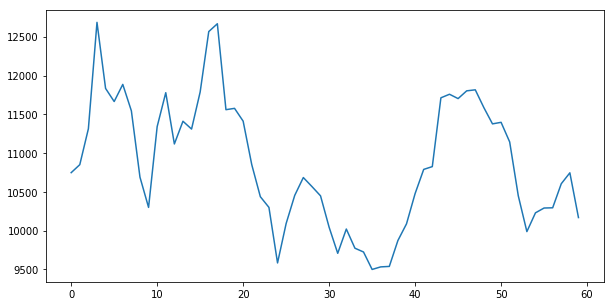

In [101]:
%matplotlib inline
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

bitcoin_price = [10748, 10851, 11314, 12686, 11834, 11665, 11886, 11545, 10690, 10300, 11342, 11779, 11118, 11411, 11310, 11788, 12567, 12668, 11560, 11577, 11412, 10852, 10438, 10300, 9584, 10092, 10455, 10685, 10569, 10449, 10044, 9708, 10021, 9774, 9725, 9500, 9533, 9539, 9873, 10088, 10478, 10790, 10826, 11713, 11759, 11703, 11803, 11816, 11586, 11377, 11397, 11144, 10450, 9988, 10230, 10292, 10295, 10605, 10746, 10169]
matplotlib.pyplot.plot(bitcoin_price)

What if we wanted to smoothen all these peaks to see the trend? 

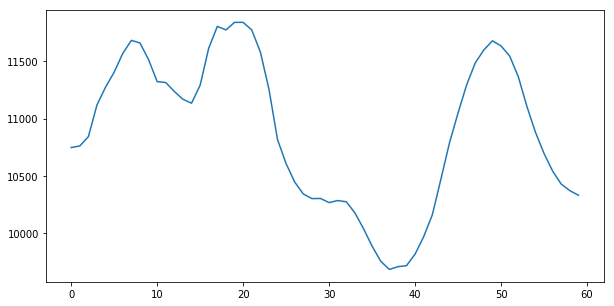

In [107]:
bitcoin_price_7avg = []
d = collections.deque([bitcoin_price[0]] * 7, 7)
for p in bitcoin_price:
    d.append(p)
    bitcoin_price_7avg.append(sum(d) / 7)
    
matplotlib.pyplot.plot(bitcoin_price_7avg)

`collections.OrderedDict` is a dict that remembers the order that keys were first inserted.

In [127]:
d = dict()
d['banana'] = 3
d['apple'] = 4
d['pear'] = 1
d['orange'] = 2
for k, v in d.items():
    print k, "=", v

orange = 2
pear = 1
banana = 3
apple = 4


Now, using `collections.OrderedDict`:

In [126]:
od = collections.OrderedDict()
od['banana'] = 3
od['apple'] = 4
od['pear'] = 1
od['orange'] = 2
for k, v in od.items():
    print k, "=", v

banana = 3
apple = 4
pear = 1
orange = 2


`collections.Counter` is a dict for counting things.

In [128]:
collections.Counter('abracadabra')

Counter({'a': 5, 'b': 2, 'c': 1, 'd': 1, 'r': 2})

### itertools

itertools deals with iterators (yield).

[Docs](https://docs.python.org/2/library/itertools.html)

In [130]:
import itertools

`itertools.cycle(iterable)` will cycle values indefinitely.

In [134]:
i = 0
for coin in itertools.cycle([':-)', ':-D']):
    print coin
    
    i += 1
    if i == 8:
        break

:-)
:-D
:-)
:-D
:-)
:-D
:-)
:-D


`itertools.permutations(iterable, r)` returns unique groups of elements respecting the order.

In [144]:
list(itertools.permutations('ABC', 2))

[('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]

`itertools.combinations(iterable, r)` creates combinations of length `r`, e.g. permutations disrespecting the order.

In [142]:
list(itertools.combinations('ABC', 2))

[('A', 'B'), ('A', 'C'), ('B', 'C')]

`itertool.product()` computes product of two vectors (lists)

In [140]:
print [face + suit for face, suit in itertools.product('23456789TJQKA', 'cdhs')]

['2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Tc', 'Td', 'Th', 'Ts', 'Jc', 'Jd', 'Jh', 'Js', 'Qc', 'Qd', 'Qh', 'Qs', 'Kc', 'Kd', 'Kh', 'Ks', 'Ac', 'Ad', 'Ah', 'As']
